In [1]:
#Change the width of cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizing Earnings Based On College Majors



In [2]:
grads_df = pd.read_excel('C:/Users/Jason Minhas/Jupyter Projects/Visualizing Earnings Based On College Majors/Dataset/visualizing_earnings_based_on_college_majors.xlsx')

In [3]:
grads_df.info()
grads_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


# Column Definitions
---

- **Rank** - Rank by median earnings (the dataset is ordered by this column).
- **Major_code** - Major code.
- **Major** - Major description.
- **Major_category** - Category of major.
- **Total** - Total number of people with major.
- **Sample_size** - Sample size (unweighted) of full-time.
- **Men** - Male graduates.
- **Women** - Female graduates.
- **ShareWomen** - Women as share of total.
- **Employed** - Number employed.
- **Median** - Median salary of full-time, year-round workers.
- **Low_wage_jobs** - Number in low-wage service jobs.
- **Full_time** - Number employed 35 hours or more.
- **Part_time** - Number employed less than 35 hours.

## Column to be added  in Cleaning section

# Cleaning
---

First we remove rows with missing values.

In [4]:
# remove rows with missing values
grads_df = grads_df.dropna()

# confirm row was removed
grads_df.shape

(172, 21)

# Scatter Plot

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

In [5]:
#  set up scatter plot comparisons
xy_pairings = [['Sample_size', 'Median'],
               ['Sample_size', 'Unemployment_rate'],
               ['Full_time', 'Median'],
               ['ShareWomen', 'Unemployment_rate'],
               ['Men', 'Median'],
               ['Women', 'Median']]

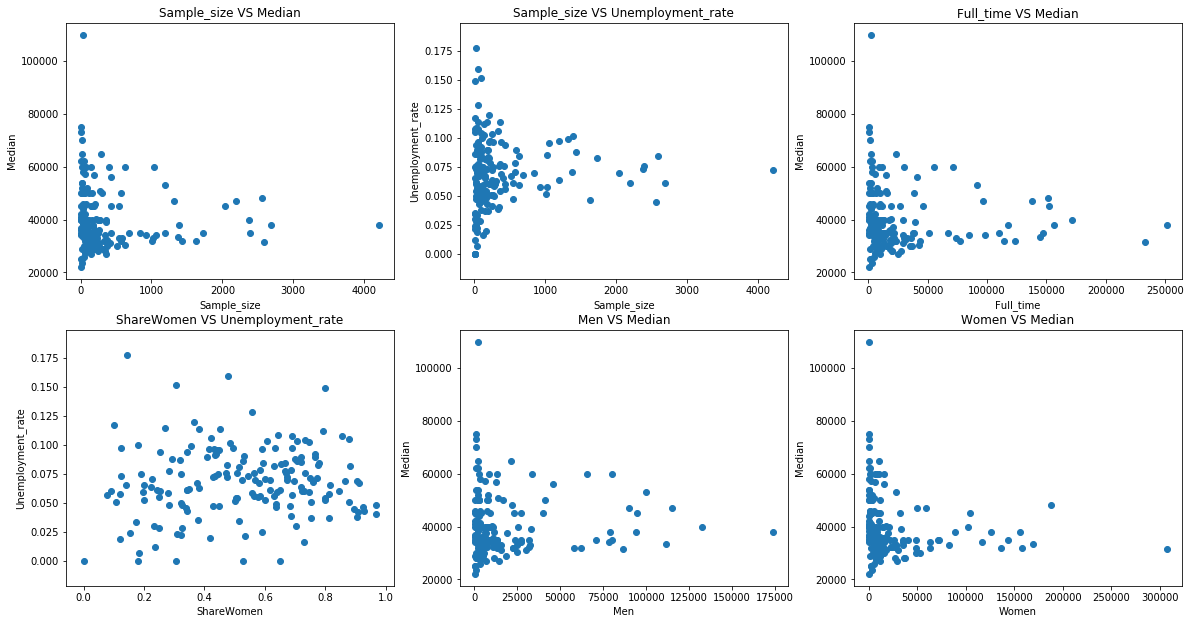

In [6]:
scatter_fig = plt.figure(figsize=(20,16))

for i in range(6):
    ax = scatter_fig.add_subplot(3,3,i+1)
    x = grads_df[xy_pairings[i][0]]
    y = grads_df[xy_pairings[i][1]]
    ax.scatter(x,y)
    title = xy_pairings[i][0] + ' VS ' + xy_pairings[i][1]
    ax.set_title(title)
    ax.set_xlabel(xy_pairings[i][0])
    ax.set_ylabel(xy_pairings[i][1])

plt.show()

# Histogram

Lets find the frequency of some of the columns.

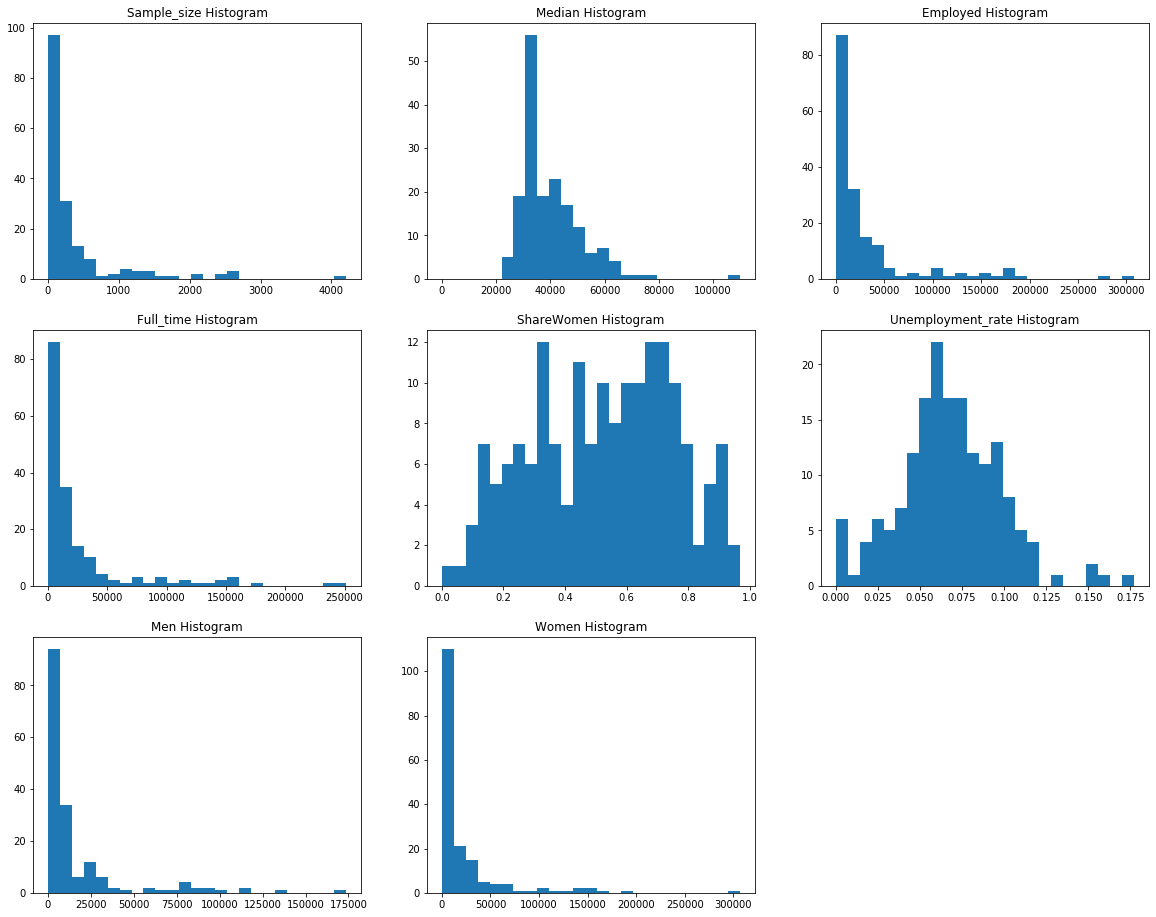

In [7]:
headers = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

histogram_fig = plt.figure(figsize=(20,16))

for i in range(8):
    ax = histogram_fig.add_subplot(3,3,i+1)
    x = grads_df[headers[i]]
    max_rng = x.max() 
    min_rng = x.min()
    ax.hist(x, bins=25, range=(0,max_rng))
    title = headers[i] + ' Histogram'
    ax.set_title(title)

plt.show()

# Scatter Matrix



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E23EF12848>,
      dtype=object)

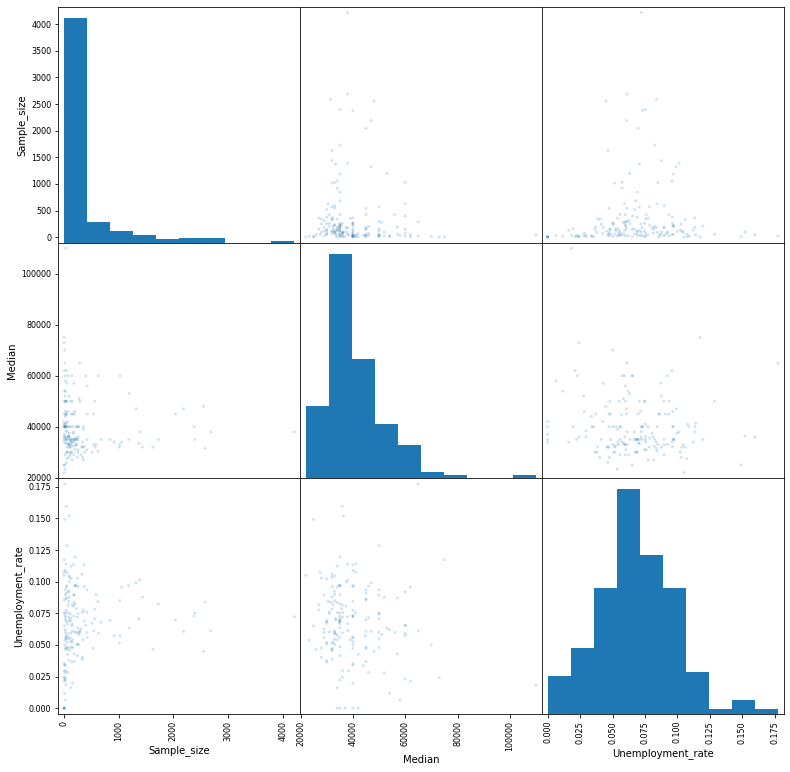

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix_df = grads_df[['Sample_size', 'Median', 'Unemployment_rate']]

pd.plotting.scatter_matrix(scatter_matrix_df, alpha=0.2, figsize=(13,13))

# Bar plot


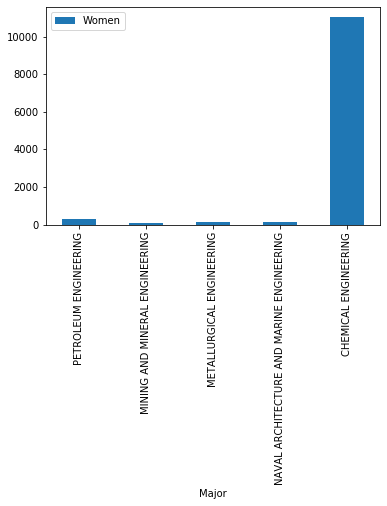

In [9]:
grads_df[:5].plot.bar(x='Major', y='Women')

In [10]:
from numpy import arange

num_cols = 'Women'

bar_heights = grads_df[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

bar_heights = grads_df[num_cols].iloc[0].values

fig, ax = plt.subplots()

ax.bar(bar_positions, bar_heights, .5)

plt.show()

AttributeError: 'numpy.float64' object has no attribute 'values'